In [272]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

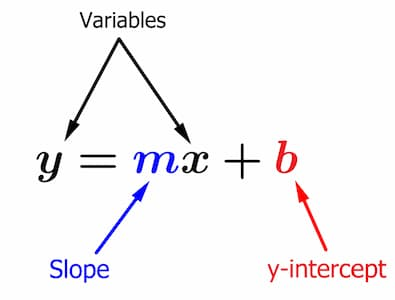

### The Line: $y = mx + b$

* **$y$**: Dependent variable (The output/prediction).
* **$x$**: Independent variable (The input feature).
* **$m$**: Slope (Determines the steepness and direction).
* **$b$**: y-intercept (Where the line crosses the vertical axis).

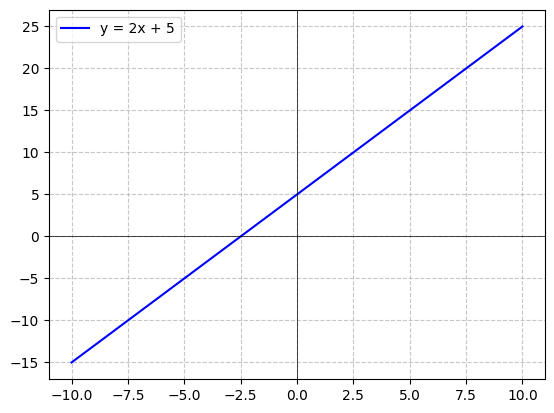

In [273]:
# Variables you can control
m = 2
b = 5

# Data generation
x = np.linspace(-10, 10, 100)
y = m * x + b

# Plotting
_ = plt.plot(x, y, label=f'y = {m}x + {b}', color='blue')
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)
_ = plt.grid(True, linestyle='--', alpha=0.7)
_ = plt.legend()

### Adding Noise

To simulate real-world data for regression, we add a random "error" ($\epsilon$) to our perfect line.

$$y = mx + b + \epsilon$$

**The Goal of Regression**:
  * Since we are generating this data, we already know the true parameters ($m=2, b=5$).
  * In practice, we only observe the noisy realizations ($y_{true}$). The objective of a regression algorithm is to **estimate** the latent parameters ($m$ and $b$) by minimizing the **error** (cost function) between the observations and the model's predictions.

**Actual vs. Predicted**

* **$y_{true}$**: The noisy observations (Red dots).
* **$y_{pred}$**: The theoretical "ideal" line we used to generate the data (Blue line).

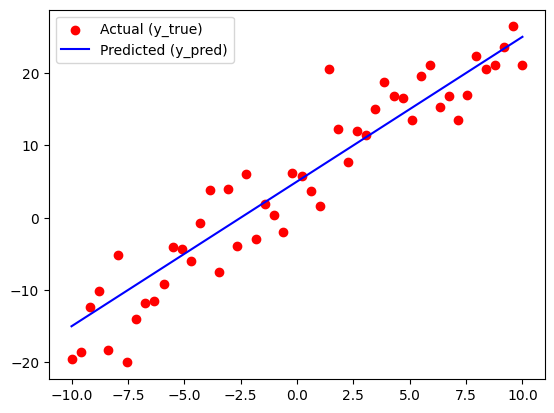

In [274]:
# Setup
m, b = 2, 5
x = np.linspace(-10, 10, 50)

# True Values (Noisy Data)
y_true = m * x + b + (np.random.randn(50) * 4)

# Predicted Values (The Line)
y_pred = m * x + b

# Plotting
_ = plt.scatter(x, y_true, color='red', label='Actual (y_true)')
_ = plt.plot(x, y_pred, color='blue', label='Predicted (y_pred)')
_ = plt.legend()

### Residuals

* **Definition**: $y_{true} - y_{pred}$.
* **Visual**: Vertical lines showing the "error" for each point.

**Metrics**

* **Sum of Squared Residuals (SSR)**: The sum of the squares of the residuals ($\sum (y_{true} - y_{pred})^2$). It measures the total discrepancy between the data and the estimation model.
* **Mean Error**: The average of residuals. Because positive and negative errors cancel each other out, this mainly indicates if the model has a systematic bias (overestimating or underestimating).
* **Mean Squared Error (MSE)**: The average of squared residuals. Squaring ensures all errors are positive and penalizes larger outliers more heavily.
* **Root Mean Squared Error (RMSE)**: The square root of MSE. It brings the error metric back to the same units as the target variable ($y$), making it more interpretable.
* **Coefficient of Determination ($R^2$ Score)**: 
    * **Formula**: $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
    * **Logic**: It represents the proportion of variance in the dependent variable that is predictable from the independent variables.
    * **Interpretation**: 
        * **1.0**: Perfect fit.
        * **0.0**: The model performs no better than a horizontal line representing the mean of the data.
        * **Negative**: The model is worse than simply predicting the mean.

Sum of Squared Residuals (SSR): 240.77
Mean Error: 0.78
Mean Squared Error (MSE): 12.04
Root Mean Squared Error (RMSE): 3.47
R2 Score: 0.9095


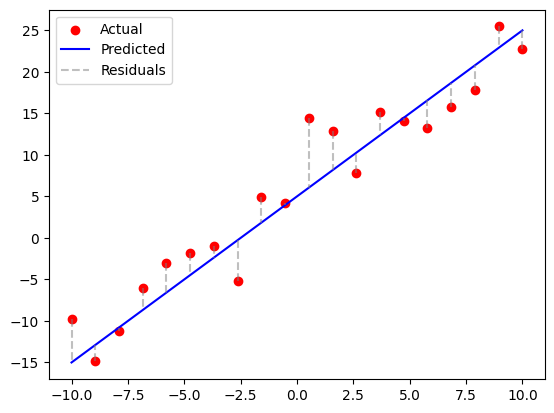

In [275]:
# Setup
m, b = 2, 5
x = np.linspace(-10, 10, 20)
y_true = m * x + b + (np.random.randn(20) * 4)
y_pred = m * x + b

# Metrics
residuals = y_true - y_pred
ssr = np.sum(residuals**2)
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

# R2 Score calculation
ss_tot = np.sum((y_true - np.mean(y_true))**2)
r2 = 1 - (ssr / ss_tot)

print(f"Sum of Squared Residuals (SSR): {ssr:.2f}")
print(f"Mean Error: {np.mean(residuals):.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Plotting
_ = plt.scatter(x, y_true, color='red', label='Actual')
_ = plt.plot(x, y_pred, color='blue', label='Predicted')
_ = plt.vlines(x, y_true, y_pred, color='gray', linestyle='--', alpha=0.5, label='Residuals')
_ = plt.legend()

### Scenario: Height Prediction

* **Data**: Age and Height measurements of 20 individuals.
* **Goal**: Build a model to predict Height ($y$) given Age ($x$).
  * **Model**: Linear Regression (Simplest approach).

**Key Parameters**

* **Slope ($m$)**: Growth rate (How much height increases per year).
* **Intercept ($b$)**: Base height (Theoretical height at Age 0).

**Setup**

* **Independent Variable ($x$)**: Age (Years).
* **Target ($y$)**: Height (cm).
* **Goal**: Evaluate 3 manual guesses for slope ($m$) and intercept ($b$).
* **Visuals**: 3 subplots showing the guessed lines and their residuals.

,Age,Height
0,2,72
1,5,84
2,4,94
3,6,100
4,5,105


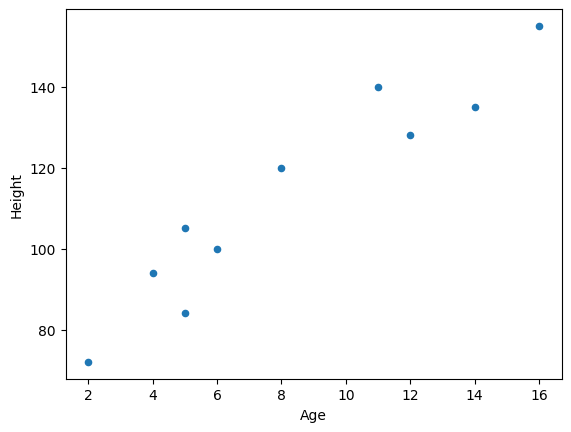

In [276]:
data = pd.DataFrame([[2, 72],
                     [5, 84],
                     [4, 94],
                     [6, 100],
                     [5, 105],
                     [8, 120],
                     [12, 128],
                     [11, 140],
                     [14, 135],
                     [16, 155]], columns=['Age', 'Height'])

data.head()

_ = data.plot(kind='scatter', x='Age', y='Height')

Guess 1 (m=3, b=80):
  SSR:        2452.00
  Mean Error: 8.40
  MSE:        245.20
  RMSE:       15.66
  R2 Score:   0.6148

Guess 2 (m=5, b=65):
  SSR:        1110.00
  Mean Error: 6.80
  MSE:        111.00
  RMSE:       10.54
  R2 Score:   0.8256

Guess 3 (m=6, b=80):
  SSR:        3415.00
  Mean Error: -16.50
  MSE:        341.50
  RMSE:       18.48
  R2 Score:   0.4636



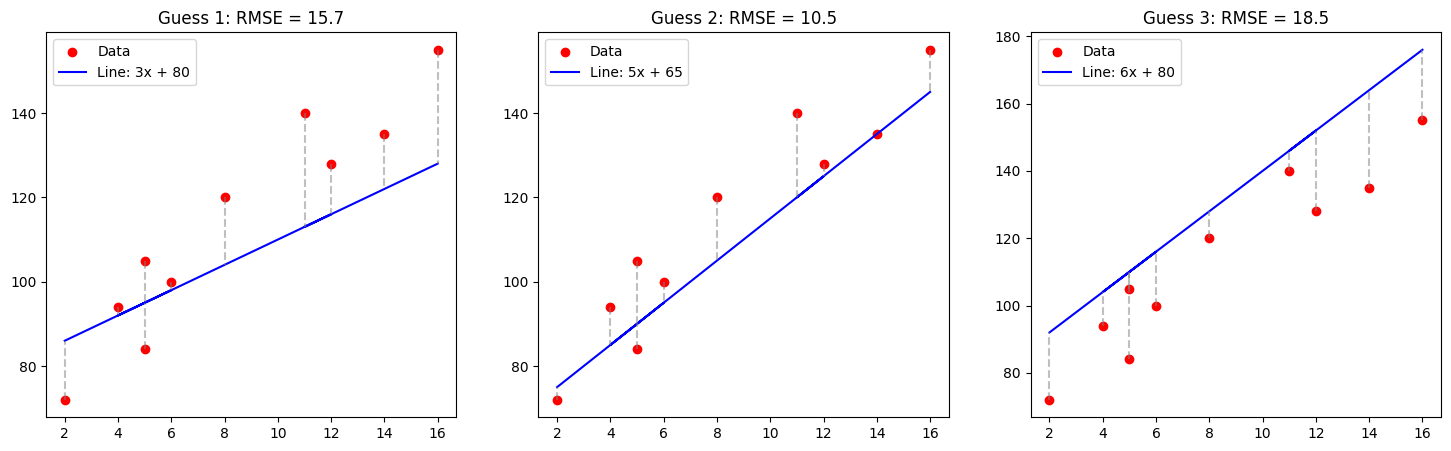

In [277]:
# Variables from DataFrame
x = data['Age'].values
y = data['Height'].values

# Manual Guesses (m, b)
guesses = [(3, 80), (5, 65), (6, 80)]

# Plotting & Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (m, b) in enumerate(guesses):
  # Predictions & Residuals
  y_pred = m * x + b
  residuals = y - y_pred

  # Metrics
  ssr = np.sum(residuals**2)
  mse = np.mean(residuals**2)
  rmse = np.sqrt(mse)

  # R2 Score calculation
  ss_tot = np.sum((y - np.mean(y))**2)
  r2 = 1 - (ssr / ss_tot)

  print(f"Guess {i+1} (m={m}, b={b}):")
  print(f"  SSR:        {ssr:.2f}")
  print(f"  Mean Error: {np.mean(residuals):.2f}")
  print(f"  MSE:        {mse:.2f}")
  print(f"  RMSE:       {rmse:.2f}")
  print(f"  R2 Score:   {r2:.4f}\n")

  # Plot
  _ = axes[i].scatter(x, y, color='red', label='Data')
  _ = axes[i].plot(x, y_pred, color='blue', label=f'Line: {m}x + {b}')
  _ = axes[i].vlines(x, y, y_pred, color='gray', linestyle='--', alpha=0.5)
  _ = axes[i].set_title(f'Guess {i+1}: RMSE = {rmse:.1f}')
  _ = axes[i].legend()

### Brute Force Approach

**Pairwise Iteration**

* **Strategy**: Calculate the line connecting every possible pair of points ($N^2$ iterations).
* **Two-Point Formula**:
    * $m = \frac{y_2 - y_1}{x_2 - x_1}$
    * $b = y_1 - m x_1$
* **Limitations**:
    * **Inefficient**: Performs $N^2$ iterations (400 for 20 points); in each iteration, the model must iterate through the entire dataset to calculate predictions, residuals, and the final RMSE for every sample.
    * **Sub-optimal**: Assumes the "best" line perfectly passes through at least two data points (often false).

Best Fit (Brute Force):
  Slope (m):     5.5000
  Intercept (b): 67.0000
  SSR:           624.75
  RMSE:          7.9041
  R2 Score:      0.9019


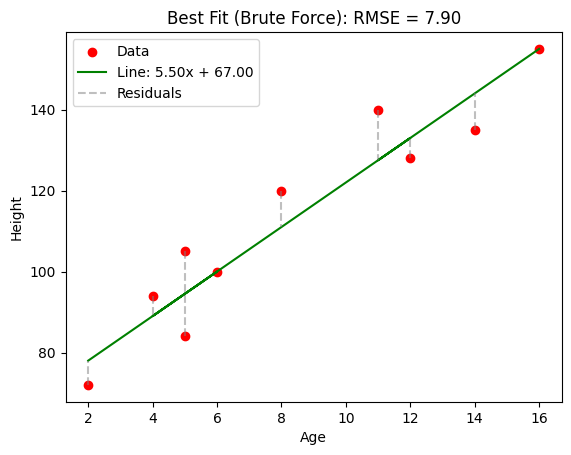

In [280]:
best_rmse = float('inf')
best_m, best_b = 0, 0

# Variables from DataFrame
x_vals = data['Age'].values
y_vals = data['Height'].values

# Iterate through all unique pairs
for i in range(len(x_vals)):
  for j in range(len(x_vals)):
    if i == j:
      continue

    # 1. Calculate m and b for this pair
    x1, y1 = x_vals[i], y_vals[i]
    x2, y2 = x_vals[j], y_vals[j]

    if x2 - x1 == 0:
      continue  # Skip vertical lines

    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # 2. Calculate metrics for this line against ALL points
    y_pred = m * x_vals + b
    rmse = np.sqrt(np.mean((y_vals - y_pred)**2))

    # 3. Store if best
    if rmse < best_rmse:
      best_rmse = rmse
      best_m, best_b = m, b

# Calculate final metrics for the best fit
y_pred_best = best_m * x_vals + best_b
ssr = np.sum((y_vals - y_pred_best)**2)
ss_tot = np.sum((y_vals - np.mean(y_vals))**2)
r2 = 1 - (ssr / ss_tot)

print(f"Best Fit (Brute Force):")
print(f"  Slope (m):     {best_m:.4f}")
print(f"  Intercept (b): {best_b:.4f}")
print(f"  SSR:           {ssr:.2f}")
print(f"  RMSE:          {best_rmse:.4f}")
print(f"  R2 Score:      {r2:.4f}")

# Plotting
_ = plt.scatter(x_vals, y_vals, color='red', label='Data')
_ = plt.plot(x_vals, y_pred_best, color='green', label=f'Line: {best_m:.2f}x + {best_b:.2f}')
_ = plt.vlines(x_vals, y_vals, y_pred_best, color='gray',
               linestyle='--', alpha=0.5, label='Residuals')
_ = plt.title(f'Best Fit (Brute Force): RMSE = {best_rmse:.2f}')
_ = plt.xlabel('Age')
_ = plt.ylabel('Height')
_ = plt.legend()

### Optimal Solution with Scikit-Learn

**Linear Regression**

* **Method**: Ordinary Least Squares (OLS).
* **Advantage**: Analytically finds the global minimum error (optimal line).
* **Guarantees**: The best possible $m$ and $b$ for the given data (lowest MSE).

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Scikit-Learn Optimal Fit:
  Slope (m):     5.3867
  Intercept (b): 68.5906
  SSR:           617.98
  RMSE:          7.8612
  R2 Score:      0.9029


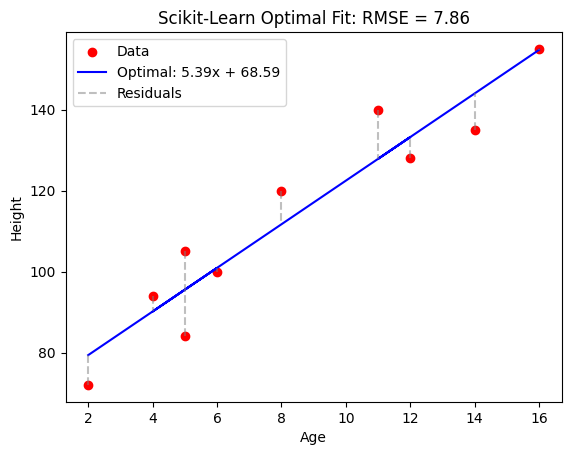

In [282]:
from sklearn.linear_model import LinearRegression

# Variables from DataFrame
X = data[['Age']]  # sklearn expects a 2D array for features
y = data['Height'].values

# Model Training
model = LinearRegression()
model.fit(X, y)

# Parameters
m = model.coef_[0]
b = model.intercept_

# Evaluation
y_pred = model.predict(X)

# Metrics calculation
ssr = np.sum((y - y_pred)**2)
rmse = np.sqrt(np.mean((y - y_pred)**2))
r2 = model.score(X, y)  # Or manually: 1 - (ssr / np.sum((y - y.mean())**2))

print(f"Scikit-Learn Optimal Fit:")
print(f"  Slope (m):     {m:.4f}")
print(f"  Intercept (b): {b:.4f}")
print(f"  SSR:           {ssr:.2f}")
print(f"  RMSE:          {rmse:.4f}")
print(f"  R2 Score:      {r2:.4f}")

# Plotting
_ = plt.scatter(data['Age'], y, color='red', label='Data')
_ = plt.plot(data['Age'], y_pred, color='blue', label=f'Optimal: {m:.2f}x + {b:.2f}')
_ = plt.vlines(data['Age'], y, y_pred, color='gray', linestyle='--', alpha=0.5, label='Residuals')
_ = plt.title(f'Scikit-Learn Optimal Fit: RMSE = {rmse:.2f}')
_ = plt.xlabel('Age')
_ = plt.ylabel('Height')
_ = plt.legend()

### OLS Implementation (From Scratch)

**Steps: Ordinary Least Squares (OLS)**

1. **Calculate Means**: $\bar{x}$ (mean of age), $\bar{y}$ (mean of height).
2. **Calculate Deviations**: 
   * $d_x = x - \bar{x}$
   * $d_y = y - \bar{y}$
3. **Calculate Slope ($m$)**: 
   * Formula: $m = \frac{\sum(d_x \cdot d_y)}{\sum(d_x^2)}$
   * Logic: Covariance of $x, y$ divided by Variance of $x$.
4. **Calculate Intercept ($b$)**: 
   * Formula: $b = \bar{y} - m\bar{x}$

In [284]:
# Variables from DataFrame
x_vals = data['Age'].values
y_vals = data['Height'].values

x_mean = np.mean(x_vals)
y_mean = np.mean(y_vals)

# Calculate terms for slope (Covariance / Variance)
numerator = np.sum((x_vals - x_mean) * (y_vals - y_mean))
denominator = np.sum((x_vals - x_mean)**2)

# Calculate parameters
m = numerator / denominator
b = y_mean - (m * x_mean)

# Predictions
y_pred = m * x_vals + b

# Metrics
ssr = np.sum((y_vals - y_pred)**2)
mse = np.mean((y_vals - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (ssr / np.sum((y_vals - y_mean)**2))

print(f"OLS Fit:")
print(f"  Slope (m):     {m:.4f}")
print(f"  Intercept (b): {b:.4f}")
print(f"  SSR:           {ssr:.2f}")
print(f"  RMSE:          {rmse:.4f}")
print(f"  R2 Score:      {r2:.4f}")

OLS Fit:
  Slope (m):     5.3867
  Intercept (b): 68.5906
  SSR:           617.98
  RMSE:          7.8612
  R2 Score:      0.9029


### How Simple OLS Works

**1. The Simple Formula logic**

* **Math derivation**: It comes from calculus. We take the MSE equation ($E = \frac{1}{n}\sum(y - (mx+b))^2$), take partial derivatives with respect to $m$ and $b$, set them to 0, and solve.
* **Intuitive View**:
    * **Numerator**: $\sum(x-\bar{x})(y-\bar{y})$ $\approx$ **Covariance**. Measures how much $x$ and $y$ move *together*.
    * **Denominator**: $\sum(x-\bar{x})^2$ $\approx$ **Variance**. Measures how much $x$ spreads out.
    * **Ratio**: We are scaling the "co-movement" by the "spread of x".

**2. Does it work for 2 or 3 features?**

* **Short Answer**: **No.**
* **Reason**: 
    * The simple formula assumes a 2D plane (1 input, 1 output). 
    * With 2 features ($x_1, x_2$), you are fitting a **Plane** in 3D space, not a line.
    * With 3+ features, you are fitting a **Hyperplane**.
    * You cannot use a single scalar division. You must use **Linear Algebra (Matrices)**.

### The Normal Equation

**To handle 1, 2, or $N$ features, we switch to matrix notation.**

$$\beta = (X^T X)^{-1} X^T y$$

* **$X$**: Design Matrix $(m \times n)$. Rows are samples, columns are features.
  * $m$: Number of samples.
  * $n$: Number of features (⚠️ including the bias column).
* **$y$**: Target Vector $(m \times 1)$.
* **$\beta$**: Coefficients Vector $(n \times 1)$.

**The Bias Trick (Column of Ones)**

* **Goal**: Solve for intercept ($b$) and slopes ($w$) in a single matrix operation.
* **Math**:
    * Standard: $y = b + w_1x_1 + \dots + w_nx_n$
    * Rewrite: $y = w_0(1) + w_1x_1 + \dots + w_nx_n$ (where $w_0 = b$)
* **Implementation**: By adding a column where $x_0 = 1$ for every sample, the intercept becomes just another weight ($w_0$) to learn.

In [285]:
# Simple OLS (One Feature only)
def simple_ols(x, y):
  num = np.sum((x - np.mean(x)) * (y - np.mean(y)))
  den = np.sum((x - np.mean(x))**2)
  m = num / den
  b = np.mean(y) - m * np.mean(x)
  return m, b  # Returns m, b


# General OLS (Any number of features)
# ⚠️ Consumer must provide X with the bias (intercept) column already added.
def general_ols(X, y):
  # Calculate Gram Matrix (X^T * X)
  # Captures variance and covariance of features
  gram_matrix = X.T @ X

  # Calculate Moment Vector (X^T * y)
  # Captures the relationship between features and target
  moment_vector = X.T @ y

  # Calculate Gram Matrix Inverse
  gram_inv = np.linalg.inv(gram_matrix)

  # Solve for Beta coefficients
  beta = gram_inv @ moment_vector
  return beta

### Regression with two features

In [286]:
data = pd.DataFrame([
    [2,  14,  72],
    [5,  20,  84],
    [4,  26,  94],
    [6,  35,  100],
    [5,  38,  105],
    [8,  44,  120],
    [12, 50,  128],
    [11, 60,  140],
    [14, 52,  135],
    [16, 46,  155],
], columns=['Age', 'Weight', 'Height'])

data.head()

,Age,Weight,Height
0,2,14,72
1,5,20,84
2,4,26,94
3,6,35,100
4,5,38,105


3D Scatter Plot

In [289]:
fig = px.scatter_3d(data, x='Age', y='Weight', z='Height',
                    title='3D Visualization of Age, Weight, and Height')

# Size & Camera
fig.update_layout(
    width=600, height=600,
    scene=dict(
        xaxis_title='Age (Years)',
        yaxis_title='Weight (kg)',
        zaxis_title='Height (cm)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5))
    ))

Stack Bias, Age, and Weight into one Design Matrix (X)

In [290]:
X = np.c_[(np.ones(len(data)), data[['Age', 'Weight']])]
X[:5]  # First 5 rows
X.shape

array([[ 1.,  2., 14.],
       [ 1.,  5., 20.],
       [ 1.,  4., 26.],
       [ 1.,  6., 35.],
       [ 1.,  5., 38.]])

(10, 3)

Height as output vector (y)

In [291]:
y = data['Height']
y.shape

(10,)

Training

In [292]:
beta = general_ols(X, y)
beta
beta.shape

array([56.2306677 ,  3.50873594,  0.72589153])

(3,)

In [295]:
beta_0 = beta[0]
beta_1 = beta[1]
beta_2 = beta[2]

# Coefficients
print(f"Intercept (β0) = {beta_0:.2f}")
print(f"Age_w (β1) = {beta_1:.2f}")
print(f"Weight_w (β2) = {beta_2:.2f}")

# Final Equation
print(f"\nFinal Equation:")
print(f"Height = {beta_0:.2f} + {beta_1:.2f}(Age) + {beta_2:.2f}(Weight)")

Intercept (β0) = 56.23
Age_w (β1) = 3.51
Weight_w (β2) = 0.73

Final Equation:
Height = 56.23 + 3.51(Age) + 0.73(Weight)


Let's make the predictions

$$\hat{y} = X_{test} \cdot \beta$$

In [298]:
X.shape, beta.shape  # (3,) is like (3, 1) in matrix multiplication

((10, 3), (3,))

In [299]:
y_pred = X @ beta
y_pred
y_pred.shape

array([ 73.41062103,  88.29217805,  89.1387913 , 102.68928698,
       101.35822564, 116.23978265, 134.6300756 , 138.38025499,
       143.09933054, 145.76145322])

(10,)

Evaluation

In [304]:
# Metrics
ssr = np.sum((y - y_pred)**2)
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)

ss_res = ssr
ss_tot = np.sum((y - y.mean())**2)
r2 = 1 - (ss_res / ss_tot)

# Printing
print(f"SSR:      {ssr:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"RMSE:     {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

SSR:      276.21
MSE:      27.62
RMSE:     5.26
R² Score: 0.9566


### Visualizing the Regression Plane

Create Grid (Mesh) based on the range of the current data

In [210]:
x_grid = np.linspace(data['Age'].min(), data['Age'].max(), 10)
x_grid
x_grid.shape

y_grid = np.linspace(data['Weight'].min(), data['Weight'].max(), 10)
y_grid
y_grid.shape

array([ 2.        ,  3.55555556,  5.11111111,  6.66666667,  8.22222222,
        9.77777778, 11.33333333, 12.88888889, 14.44444444, 16.        ])

(10,)

array([14.        , 19.11111111, 24.22222222, 29.33333333, 34.44444444,
       39.55555556, 44.66666667, 49.77777778, 54.88888889, 60.        ])

(10,)

In [212]:
xx, yy = np.meshgrid(x_grid, y_grid)
xx.shape
yy.shape

(10, 10)

(10, 10)

Calculate Z for Grid using the learned Beta coefficients

Plane Equation: z = β0 + β1(Age) + β2(Weight)

In [213]:
zz = beta[0] + beta[1] * xx + beta[2] * yy
zz.shape

(10, 10)

3D Plotting

In [260]:
fig = go.Figure()

# Add Actual Data Points
_ = fig.add_trace(go.Scatter3d(
    x=data['Age'], y=data['Weight'], z=data['Height'],
    mode='markers', marker=dict(size=5, color='red'), name='Actual Data'
))

# Add the Regression Plane
_ = fig.add_trace(go.Surface(
    x=xx, y=yy, z=zz,
    opacity=0.6, colorscale='Blues', showscale=False, name='Regression Plane'
))

# Layout & Camera Control
fig.update_layout(
    title='Visualizing Regression Plane',
    scene=dict(
        xaxis_title='Age (Years)', yaxis_title='Weight (kg)', zaxis_title='Height (cm)',
        # camera=dict(eye=dict(x=1, y=1, z=1))
    ),
    width=600, height=600,
    # margin=dict(l=20, r=20, b=20, t=20)
)

### OLS vs. Gradient Descent

**1. Ordinary Least Squares (OLS)**

* **Mechanism**: Analytical Solution (Math formula jumps straight to the answer).
* **Pros**: Guarantees exact optimal solution; No tuning required.
* **Cons**: Computationally expensive for large datasets. Inverting matrices is slow ($O(n^3)$).
* **Use Case**: Small to medium data.

**2. Gradient Descent (GD)**

* **Mechanism**: Iterative Optimization (Steps "downhill" to find the bottom).
* **Pros**: Highly scalable; Memory efficient.
* **Cons**: Approximate (converges to optimal); Requires tuning (Learning Rate).
* **Use Case**: Big Data / Deep Learning.


### Gradient Descent Implementation

**Gradient Descent (Batch)**

* **Logic**: Iteratively adjust weights ($w$) to minimize error.
* **Update Rule**: $w = w - \alpha \cdot \nabla J(w)$
    * $\alpha$ (Alpha): Learning Rate (Step size).
    * $\nabla J$ (Gradient): Direction of steepest increase in error.
* **Formula**: $w_{new} = w_{old} - \alpha \cdot \frac{2}{n} X^T (Xw - y)$

In [32]:
def gradient_descent(X, y, lr=0.0001, epochs=100000):
  # Add Intercept (Bias) column of 1s
  intercept_col = np.ones((len(X), 1))
  X = np.c_[intercept_col, X]
  m, n = X.shape

  theta = np.zeros(n)  # Initialize weights

  for _ in range(epochs):
    prediction = X.dot(theta)
    error = prediction - y
    gradient = (2/m) * X.T.dot(error)
    theta = theta - lr * gradient

  return theta

In [33]:
# 1. Data (2 Features: Age, Weight)
age = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
weight = np.array([12, 14, 16, 19, 22, 25, 28, 32, 35, 38,
                   42, 45, 50, 55, 60, 63, 68, 70, 75, 78])
height = np.array([72, 65, 98, 80, 95, 108, 100, 145, 120, 128,
                   118, 138, 142, 110, 165, 158, 172, 165, 185, 175])

# 2. Preparation
X = np.column_stack((age, weight))

# 3. Training
theta = gradient_descent(X, height, lr=0.0001, epochs=100000)
print(f"Params: Intercept={theta[0]:.2f}, Age_w={theta[1]:.2f}, Weight_w={theta[2]:.2f}")

# 4. Prediction
# Add 1s col to match theta shape (intercept + 2 weights)
intercept_col = np.ones((len(X), 1))
X = np.c_[intercept_col, X]
y_pred = X @ theta

# 5. Evaluation
rmse = np.sqrt(np.mean((height - y_pred)**2))
print(f"RMSE: {rmse:.4f}")

Params: Intercept=60.91, Age_w=6.15, Weight_w=-0.12
RMSE: 13.2374


### Benchmarking: OLS vs GD

In [34]:
# 1. Synthetic Data (Large)
n_rows = 100
n_cols = 10**4

X = np.random.randn(n_rows, n_cols)
y = np.random.randn(n_rows)

# 2. Benchmark
print(f"Starting OLS on {n_rows:,} x {n_cols:,} matrix...")
start = time.time()
theta = general_ols(X, y)
end = time.time()

print(f"Execution Time: {(end - start) * 1000:.4f} ms")

Starting OLS on 100 x 10,000 matrix...
Execution Time: 37546.5555 ms


In [35]:
# 1. Synthetic Data (Large)
n_rows = 100
n_cols = 10**4

X = np.random.randn(n_rows, n_cols)
y = np.random.randn(n_rows)

# 2. Benchmark
print(f"Starting GD on {n_rows:,} x {n_cols:,} matrix ({100} epochs)...")
start = time.time()
theta = gradient_descent(X, y, lr=0.01, epochs=100)
end = time.time()

print(f"Execution Time: {(end - start) * 1000:.4f} ms")

Starting GD on 100 x 10,000 matrix (100 epochs)...
Execution Time: 134.1169 ms


In [36]:
39585.5312 / 45.8426

863.5097311234529